In [31]:
%matplotlib inline
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import statistics as stat

from sklearn.cluster import KMeans

# Here I define the k means datafaker

## I have modifyed the datafaker to include a shuffle option.

This allows for the returned points to be ordered (all the points from cluster 1 first, all the points from cluster 2 second and so on) or randomly shuffled.

In [11]:
def k_means_datafaker(k, centroid_list, dist_chars_list, points_splt, shuffle = 'yes'):
    
    if len(centroid_list) != k:
        print('You ust provide a centroid x,y pair for every cluster')
    if len(dist_chars_list) != k:
        print('You ust provide a covariance matrix for every cluster')
    if len(points_splt) != k:
        print('You ust provide a number of points for every cluster')
        
    total_points = sum(points_splt)    
    points = np.empty([total_points,3])
    
    index = 0
    for i in range(k):

        centroid = centroid_list[i]
        dist_chars = dist_chars_list[i]
        p = points_splt[i]

        points_in_cluster = np.random.multivariate_normal(centroid,dist_chars,p)
        
        points[index:index+p,:2] = points_in_cluster
        points[index:index+p,2] = i+1

        index = index+p
        
    if shuffle == 'yes':
        np.take(points,np.random.permutation(points.shape[0]),axis=0,out=points)

    return points

# Here is an example of the use of the datafaker

We will generate data in 3 clusters

centroid_list is a list of arrays whit the x,y coordinates of each cluster /n

cov_list is a list of matrices with the variance covariance of the gaussian distributions

points_split is a list of integers whith the number of points you want from each cluster

[[  0.9981839   -0.94526511]
 [ -0.40885167   0.37155822]
 [ -3.95191423  23.45143733]]


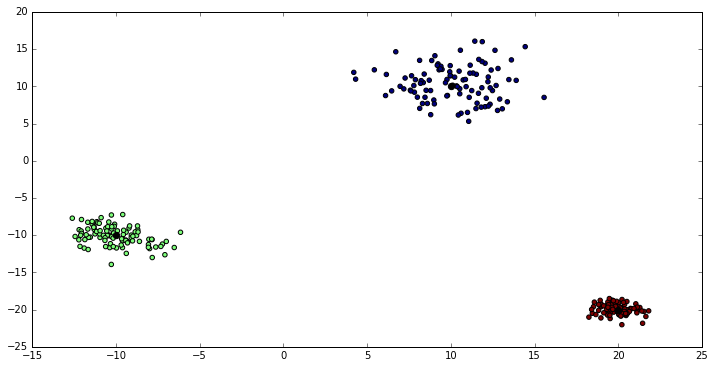

In [129]:
centroid_list = [np.array([10,10]), np.array([-10,-10]), np.array([20,-20])]
centroid_array = np.empty([len(centroid_list),2])
for i in range(len(centroid_list)):
    centroid_array[i,0] = centroid_list[i][0]
    centroid_array[i,1] = centroid_list[i][1]

cov_list = [np.array([[5,0],[0,5]]), np.array([[2,-1],[-1,2]]), np.array([[0.5,0],[0,0.5]])]
points_split = [100,100,100]

test_points_3k = k_means_datafaker(3, centroid_list, cov_list, points_split, shuffle = 'yes')
plt.scatter(test_points_3k[:,0],test_points_3k[:,1], c = test_points_3k[:,2])
plt.scatter(centroid_array[:,0], centroid_array[:,1],marker='o',color='black', s=40)

# Development of the kmeans++ method for centroids location

[[-11.13424938  -7.07542497]
 [ 12.07523726   5.76255552]
 [  8.38083415  14.84508023]]


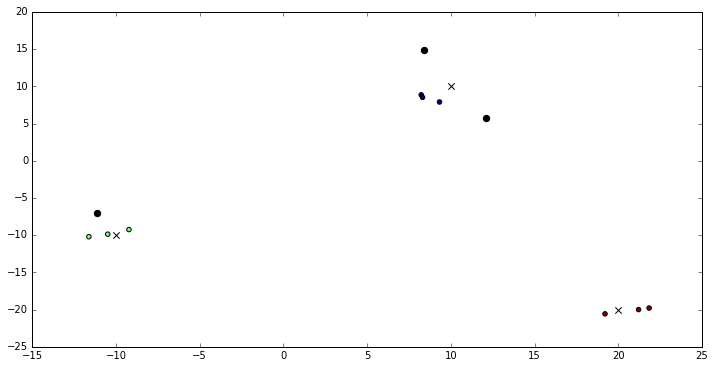

In [183]:
centroid_list = [np.array([10,10]), np.array([-10,-10]), np.array([20,-20])]
centroid_array = np.empty([len(centroid_list),2])
for i in range(len(centroid_list)):
    centroid_array[i,0] = centroid_list[i][0]
    centroid_array[i,1] = centroid_list[i][1]

cov_list = [np.array([[5,0],[0,5]]), np.array([[2,-1],[-1,2]]), np.array([[0.5,0],[0,0.5]])]
points_split = [3,3,3]

points= test_points_3k[:,:2]

k=3
centroids = np.empty([k,2])
centroids[:] = np.NaN
#Choose the first centroid as a random data point
centroids[0,:] = np.take(points,np.random.randint(np.shape(points)[0]),axis=0)

for c in range(1,k):
    #create an array for the distances of every point to the already chosen centroids
    distances = np.empty([np.shape(points)[0],c])
    for cc in range(c):
        distances[:,cc] = np.square(points[:,0] - centroids[cc,0]) + np.square(points[:,1] - centroids[cc,1])
        distances_sum = np.sum(distances, axis=1)
        distance_probs = distances_sum/np.sum(distances_sum, axis=0)
        #print(distance_probs)
        new_cluster_index = np.random.choice(np.shape(points)[0],1,p=distance_probs)
        centroids[c,:] = points[new_cluster_index,:]
    

print(centroids)
test_points_3k = k_means_datafaker(3, centroid_list, cov_list, points_split, shuffle = 'yes')
plt.scatter(test_points_3k[:,0],test_points_3k[:,1], c = test_points_3k[:,2])
plt.scatter(centroid_array[:,0], centroid_array[:,1],marker='x',color='black', s=40)
plt.scatter(centroids[:,0], centroids[:,1],marker='o',color='black', s=40)

[[  2.07244955  -1.05944078]
 [  2.35013585  17.98667394]
 [ 10.33461705   6.11122477]
 [  5.98723179 -15.45563445]
 [ -9.00710599 -10.8782281 ]]


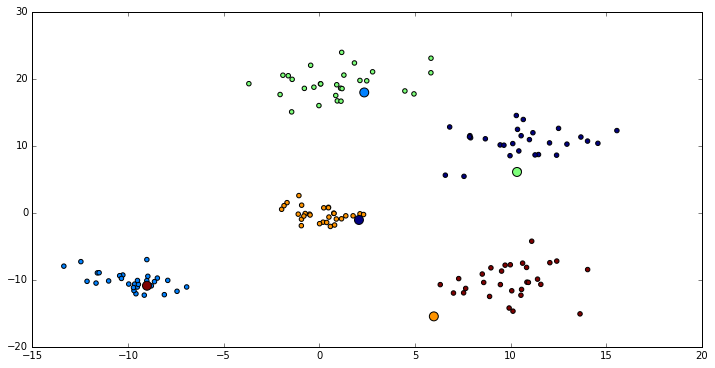

In [350]:
centroid_list_5k = [np.array([10,10]), 
                    np.array([-10,-10]), 
                    np.array([0,20]), 
                    np.array([0,0]),
                    np.array([10,-10])]

centroid_array = np.empty([len(centroid_list_5k),2])
for i in range(len(centroid_list_5k)):
    centroid_array[i,0] = centroid_list_5k[i][0]
    centroid_array[i,1] = centroid_list_5k[i][1]
    
cov_list_5k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]])]
points_split_5k = [30,30,30,30,30]

test_points_5k = k_means_datafaker(5, centroid_list_5k, cov_list_5k, points_split_5k)

points= test_points_5k[:,:2]

k=5
centroids = np.empty([k,2])
centroids[:] = np.NaN
#Choose the first centroid as a random data point
centroids[0,:] = np.take(points,np.random.randint(np.shape(points)[0]),axis=0)

for c in range(1,k):
    #create an array for the distances of every point to the already chosen centroids
    distances = np.empty([np.shape(points)[0],c])
    for cc in range(c):
        distances[:,cc] = np.abs(np.square(points[:,0] - centroids[cc,0]) + np.square(points[:,1] - centroids[cc,1]))
    distance_min = np.amin(distances, axis=1)
    distance_probs = distance_min/np.sum(distance_min)
    new_cluster_index = np.random.choice(np.shape(points)[0],1,p=distance_probs)
    centroids[c,:] = points[new_cluster_index,:]
    

print(centroids)
plt.scatter(test_points_5k[:,0],test_points_5k[:,1], c = test_points_5k[:,2])
# plt.scatter(centroid_array[:,0], centroid_array[:,1],marker='x',color='black', s=40)
cents = plt.scatter(centroids[:,0], centroids[:,1],marker='o',c=range(np.shape(centroids)[0]), s=80)

# Here is the kmeans function as coded by gpicot

This Kmeans function has been modifyed to include:

Centroid selection options, including my implementation of the kmeans++ methodology (should be checked)

An iterative proceedure to avoid sub optimal solutions as follows.

1-> The kmeans algorith is run tries =10 times

2-> The final output is the results of the kmeans calculation that had the lowest DB index

This seems to work... at least compared to the scikit learn kmeans!!!

In [516]:
def kmeans(points, k,prec=0.000001,m=1, tries = 10, init = 'k-means++'):
    l=len(points)
    
    centroids_matrix = np.empty([tries,k,2])
    list_index_matrix = np.empty([tries,np.shape(points)[0]])
    m_matrix = np.empty([tries])
    DB_matrix = np.empty([tries])
    DB_matrix[:] = np.NaN
    
    if k > l:
        print ('The partitioning is impossible')
    else:
        
        for try_num in range(tries):
            if init == 'empty':
                centroids = np.empty([k,2])

            if init == 'rand_scale':
                #Initialize the centroids as random number times the max x or y coordinate
                centroids = np.random.random([k,2])*np.amax(points)

            if init == 'foggy':
                #initialize centroids as a random selection of k points from the sample 
                #This is called foggy selection
                centroids = np.take(points,np.random.permutation(k),axis=0)

            if init == 'k-means++':
                centroids = np.empty([k,2])
                centroids[:] = np.NaN
                #Choose the first centroid as a random data point
                centroids[0,:] = np.take(points,np.random.randint(np.shape(points)[0]),axis=0)

                for c in range(1,k):
                    #create an array for the distances of every point to the already chosen centroids
                    distances = np.empty([np.shape(points)[0],c])
                    for cc in range(c):
                        distances[:,cc] = np.abs(np.square(points[:,0] - centroids[cc,0]) + np.square(points[:,1] - centroids[cc,1]))
                    distance_min = np.amin(distances, axis=1)
                    distance_probs = distance_min/np.sum(distance_min)
                    new_cluster_index = np.random.choice(np.shape(points)[0],1,p=distance_probs)
                    centroids[c,:] = points[new_cluster_index,:]
             
            # This For loop was making the starting centroids the first k points all the time!
            #for j in range(0, k):
                #centroids[j,:]=points[j,:]
                #print(centroids)
                
            m=1
            while (m > prec):
                new_centroids=np.empty([k,2])
                list_index=[]
                for i in range(0,l):
                    list_dist=[]
                    for j in range(0,k):
                        dist=np.linalg.norm(points[i,:] - centroids[j,:])
                        list_dist.append(dist)
                    min_index=np.argmin(list_dist)
                    list_index.append(min_index)
                for j in range(0,k):
                    indeces=np.where(np.asarray(list_index)==j)[0]
                    if len(indeces) > 0:
                        new_centroids[j,:]=sum(points[indeces])/(len(indeces))
                    else:
                        rand_int=rd.randint(0,l-1)
                        new_centroids[j,:]=points[rand_int,:]
                m=np.linalg.norm(centroids - new_centroids)
                centroids=new_centroids

            list_diameter=[]   
            for j in range(0,k):
                indeces=np.where(np.asarray(list_index)==j)[0]
                diameter=math.sqrt(sum(np.linalg.norm(points[indeces]- centroids[j,:],axis=1)**2)/len(indeces))
                list_diameter.append(diameter)
            Matrix_DB= np.zeros([k,k])
            for i in range(0,k):
                for j in range(0,i-1):
                    Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:]))
                for j in range(i+1,k):
                    Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:])) 

            DB=sum(np.amax(Matrix_DB, axis=1))/k
            
            centroids_matrix[try_num,:,:] = centroids[:,:]
            
            list_index_matrix[try_num,:] = list_index[:]
            m_matrix[try_num] = m
            DB_matrix[try_num] = DB
        
    smallest_db_index = np.argmin(DB_matrix)

    out_centroids = centroids_matrix[smallest_db_index,:,:]
    out_list_index = list_index_matrix[smallest_db_index,:]
    out_m = m_matrix[smallest_db_index]
    out_DB = DB_matrix[smallest_db_index]
    
    return out_centroids, out_list_index, out_m, out_DB

# Let's test the kmeans function

## Lets start with two clusters

This works pretty well

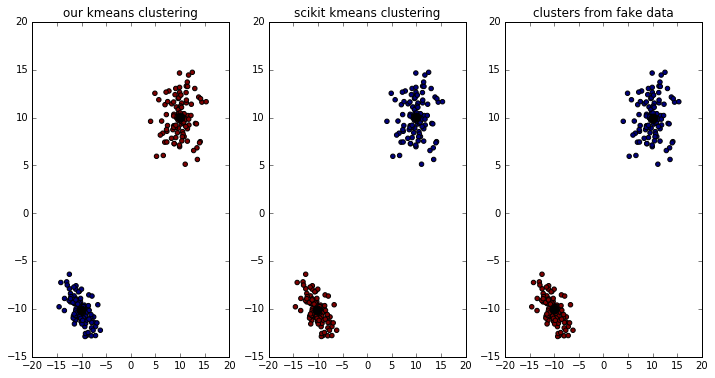

In [517]:
centroid_list_2k = [np.array([10,10]), 
                    np.array([-10,-10])]
centroid_array = np.empty([len(centroid_list_2k),2])
for i in range(len(centroid_list_2k)):
    centroid_array[i,0] = centroid_list_2k[i][0]
    centroid_array[i,1] = centroid_list_2k[i][1]
cov_list_2k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]])]
points_split_2k = [100,100]

test_points_2k = k_means_datafaker(2, centroid_list_2k, cov_list_2k, points_split_2k)

points= test_points_2k[:,:2]
centro, listo,mo,DBo=kmeans(points,2)

#Comparing to scikit learn
s_kmeans = KMeans(n_clusters=2).fit(points)

fig_size = np.empty([2,1])
fig_size[0]=12
fig_size[1]=6
plt.rcParams["figure.figsize"] = fig_size

fig, axs = plt.subplots(1,3)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=80)
axs[0].set_title('our kmeans clustering')

axs[1].scatter(points[:,0], points[:,1], c=s_kmeans.labels_)
axs[1].scatter(s_kmeans.cluster_centers_[:,0], s_kmeans.cluster_centers_[:,1],marker='o',color='black', s=80)
axs[1].set_title('scikit kmeans clustering')

axs[2].scatter(test_points_2k[:,0], test_points_2k[:,1], c=test_points_2k[:,2])
axs[2].scatter(centroid_array[:,0], centroid_array[:,1],marker='o',color='black', s=80)
axs[2].set_title('clusters from fake data')

## The problems that the kmeans seemed to have appear to have been corrected!

The incidence of suboptimal solutions us much much less!!!

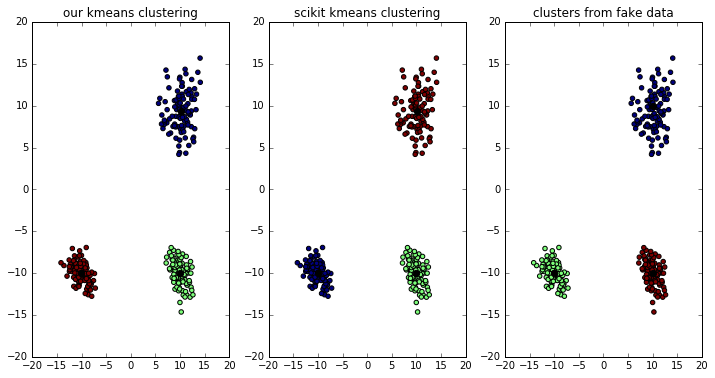

In [525]:
centroid_list_3k = [np.array([10,10]), 
                    np.array([-10,-10]),
                    np.array([10,-10])]
centroid_array = np.empty([len(centroid_list_3k),2])
for i in range(len(centroid_list_3k)):
    centroid_array[i,0] = centroid_list_3k[i][0]
    centroid_array[i,1] = centroid_list_3k[i][1]
cov_list_3k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[2,-1],[-1,2]])]
points_split_3k = [100,100,100]

test_points_3k = k_means_datafaker(3, centroid_list_3k, cov_list_3k, points_split_3k)

points= test_points_3k[:,:2]
centro, listo,mo,DBo=kmeans(points,3)

#Comparing to scikit learn
s_kmeans = KMeans(n_clusters=3).fit(points)

fig_size = np.empty([2,1])
fig_size[0]=12
fig_size[1]=6
plt.rcParams["figure.figsize"] = fig_size

fig, axs = plt.subplots(1,3)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)
axs[0].set_title('our kmeans clustering')

axs[1].scatter(points[:,0], points[:,1], c=s_kmeans.labels_)
axs[1].scatter(s_kmeans.cluster_centers_[:,0], s_kmeans.cluster_centers_[:,1],marker='o',color='black', s=40)
axs[1].set_title('scikit kmeans clustering')

axs[2].scatter(test_points_3k[:,0], test_points_3k[:,1], c=test_points_3k[:,2])
axs[2].scatter(centroid_array[:,0], centroid_array[:,1],marker='o',color='black', s=40)
axs[2].set_title('clusters from fake data')

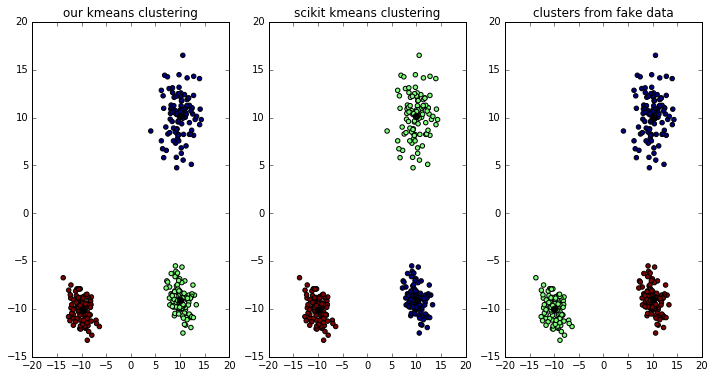

In [526]:
centroid_list_3k = [np.array([10,10]), 
                    np.array([-10,-10]),
                    np.array([10,-9])]
centroid_array = np.empty([len(centroid_list_3k),2])
for i in range(len(centroid_list_3k)):
    centroid_array[i,0] = centroid_list_3k[i][0]
    centroid_array[i,1] = centroid_list_3k[i][1]
cov_list_3k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[2,-1],[-1,2]])]
points_split_3k = [100,100,100]

test_points_3k = k_means_datafaker(3, centroid_list_3k, cov_list_3k, points_split_3k)

points= test_points_3k[:,:2]
centro, listo,mo,DBo=kmeans(points,3)

#Comparing to scikit learn
s_kmeans = KMeans(n_clusters=3).fit(points)

fig_size = np.empty([2,1])
fig_size[0]=12
fig_size[1]=6
plt.rcParams["figure.figsize"] = fig_size

fig, axs = plt.subplots(1,3)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)
axs[0].set_title('our kmeans clustering')

axs[1].scatter(points[:,0], points[:,1], c=s_kmeans.labels_)
axs[1].scatter(s_kmeans.cluster_centers_[:,0], s_kmeans.cluster_centers_[:,1],marker='o',color='black', s=40)
axs[1].set_title('scikit kmeans clustering')

axs[2].scatter(test_points_3k[:,0], test_points_3k[:,1], c=test_points_3k[:,2])
axs[2].scatter(centroid_array[:,0], centroid_array[:,1],marker='o',color='black', s=40)
axs[2].set_title('clusters from fake data')

## How about for 5 clusters

The previous version of the kmeans algorith arrived at suboptimal solutions most of the time! putting the two bottom clusters in one or sometimes the three bottom clusters into one, and splitting the top clusters into two or three!

The new kmeans seems to be pretty ok!

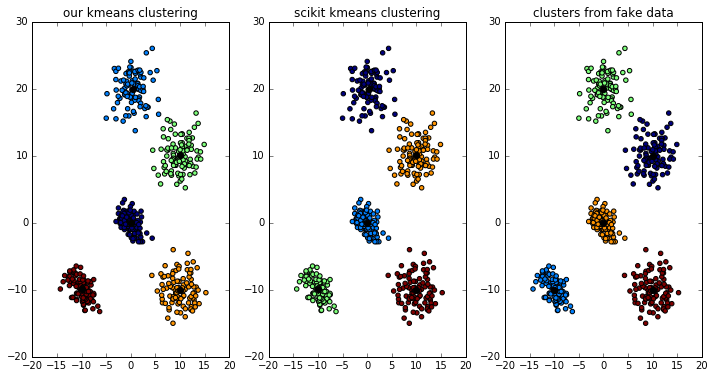

In [527]:
centroid_list_5k = [np.array([10,10]), 
                    np.array([-10,-10]), 
                    np.array([0,20]), 
                    np.array([0,0]),
                    np.array([10,-10])]

centroid_array = np.empty([len(centroid_list_5k),2])
for i in range(len(centroid_list_5k)):
    centroid_array[i,0] = centroid_list_5k[i][0]
    centroid_array[i,1] = centroid_list_5k[i][1]
    
cov_list_5k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]])]
points_split_5k = [100,100,100,100,100]

test_points_5k = k_means_datafaker(5, centroid_list_5k, cov_list_5k, points_split_5k)

points= test_points_5k[:,:2]
centro, listo,mo,DBo =kmeans(points,5)

#Comparing to scikit learn
s_kmeans = KMeans(n_clusters=5).fit(points)

fig_size = np.empty([2,1])
fig_size[0]=12
fig_size[1]=6
plt.rcParams["figure.figsize"] = fig_size

fig, axs = plt.subplots(1,3)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)
axs[0].set_title('our kmeans clustering')

axs[1].scatter(points[:,0], points[:,1], c=s_kmeans.labels_)
axs[1].scatter(s_kmeans.cluster_centers_[:,0], s_kmeans.cluster_centers_[:,1],marker='o',color='black', s=40)
axs[1].set_title('scikit kmeans clustering')

axs[2].scatter(test_points_5k[:,0], test_points_5k[:,1], c=test_points_5k[:,2])
axs[2].scatter(centroid_array[:,0], centroid_array[:,1],marker='o',color='black', s=40)
axs[2].set_title('clusters from fake data')

# Here I started to work on the comparison function

In [35]:
def comparison_function(generating_centroids, kmeans_centroids):
    
    distance_array = np.empty([len(generating_centroids)*len(kmeans_centroids),3])
    assigment_array = np.empty([len(generating_centroids),3])
    
    for i, gen_cent in enumerate(genertating_centroids):
        for j, kmeans_cent in enumerate(kmeans_centroids):
            
            x_1 = genertating_centroids[i][0]
            y_1 = genertating_centroids[i][1]
            
            x_2 = kmeans_centroids[j][0]
            y_2 = kmeans_centroids[j][1]
            
            distance = np.sqrt(np.square(x_1 - x_2) + np.square(y_1 - y_2))
            
            